# PyPlot Basics

Our sample data set for this course is the NLDL Data set from F. Kubke.

NLDL stands for "Nucleus Laminaris Delay Lines". The data in each file describes the voltage over time at a specific location in the brain.

In simple terms an electrical stimulation was applied at the point where sound enters the brain, and then electrodes measured the voltage over time at a range of locations.

By measuring the time delay from stimulation to peak voltage for each data file, we can obtain secondary data which can be combined to determine whether the stimulation came from the left ear or right ear.

Our goal here is to plot the voltage over time as recorded in a single file (for a single location).

The resulting chart will be a time series showing the voltage waveform.


## Loading the Data

We're using an external module so it's best to enable autoreload. 

This means if we make any changes to the module, the script here will be automatically updated.

To use the Jupyter autoreload functionality, we need to **load the extension** and then **initialise autoreload**.

From the [autoreload documentation](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) we can see that the "2" option means "always reload all modules":

> `%autoreload`<br>
> Reload all modules (except those excluded by %aimport) automatically now.
>
> `%autoreload 0`<br>
> Disable automatic reloading.
>
> `%autoreload 1`<br>
> Reload all modules imported with %aimport every time before executing the Python code typed.
>
> `%autoreload 2`<br>
> Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.

In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Next you need to import the NLDL parser module, which is in the **libs** folder. 

This module can take one or more NLDL files and convert them to Python objects for you. 

Also import pprint (pretty print) to make the printed data easier to inspect.

In [141]:
from libs.nldl_parser import *
from pprint import *

Set the source file. Let's just start with one.

In [142]:
source_file = 'data/TEK0000.CSV'

Create a new `parser`. Pass it the `source_file` and receive back the `data` object.

In [143]:
parser = NLDLParser()
data = parser.parse_file(source_file)

parse_file data/TEK0000.CSV
1  files reformatted


In [144]:
print("File Data:")
pprint(data)

File Data:
{'metadata': {'Firmware Version': 'FV:v6.08',
              'Horizontal Scale': '2.500000e-04',
              'Horizontal Units': 's',
              'Probe Atten': '1.000000e+01',
              'Pt Fmt': 'Y',
              'Record Length': '2.500000e+03',
              'Sample Interval': '1.000000e-06',
              'Source': 'CH1',
              'Source File': 'data/TEK0000.CSV',
              'Trigger Point': '2.400000000000e+02',
              'Vertical Offset': '2.640000e-01',
              'Vertical Scale': '2.000000e-01',
              'Vertical Units': 'V',
              'Yzero': '0.000000e+00'},
 'readings': [{'time': '  -0.000240000000', 'voltage': '  -0.02400'},
              {'time': '  -0.000239000000', 'voltage': '  -0.02400'},
              {'time': '  -0.000238000000', 'voltage': '  -0.01600'},
              {'time': '  -0.000237000000', 'voltage': '  -0.01600'},
              {'time': '  -0.000236000000', 'voltage': '  -0.00800'},
              {'time': '  -

## Generating a Chart

Before we start, let's make it so that any charts we generate display on this page rather than opening in a new window.

We use the `inline` command to plot inside the notebook rather than having a new window open.

Importing `Image` from IPython allows us to show images here in our notebook.

In [145]:
%matplotlib inline 
from IPython.display import Image

We then need to import the relevant libraries. At this point, all we need is **pyplot** for creating the charts and **numpy** for working with numbers.

In [146]:
import matplotlib.pyplot as pyplot
import numpy

A basic line chart is made of `x` and `y` values. 

To generate a chart, we need (at a bare minimum) the following steps:

- Create separate lists of all the values for the **x** axis and all the values for the **y** axis.
- Pass the x and y lists to **pyplot.plot()**.
- Use **pyplot.show()** to display the result.

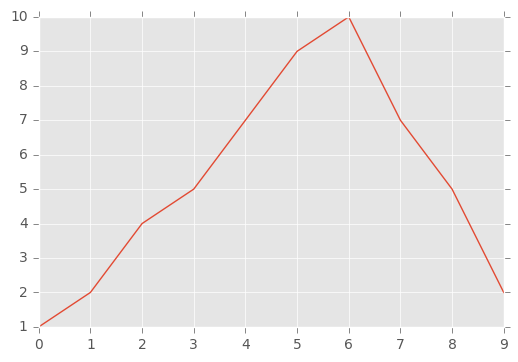

In [147]:
x_data = [0,1,2,3,4,5,6,7,8,9]
y_data = [1,2,4,5,7,9,10,7,5,2]

pyplot.plot(x_data, y_data)
pyplot.show()

## Plotting the NLDL Data

In our NLDL data, we want to plot the values from the **readings** list.

The **x** axis will be **time**.
The **y** axis will be **voltage**.

Have another look at the printed NLDL data we created earlier and identify where you can find the **time** and **voltage** for each reading.

We need to:

- Create lists for the x values and y values.
- Look at each reading from the list of readings.
- Extract the reading's time and save it to the x values.
- Extract the reading's voltage and save it to the y values.
- Plot the data.

## Extract the X and Y Data

Here we need to look at each reading individually and extract the x value (time) and the y value (voltage).

Each value will be saved to the relevant list.

In [148]:
x_data = []
y_data = []

for reading in data['readings']:
    
    time = reading['time']
    time = float(time) * 1000
    x_data.append(time)
    
    voltage = reading['voltage']
    y_data.append(voltage)

We should also check that our data looks reasonable before we begin plotting it...

In [149]:
pprint(x_data)

[-0.24000000000000002,
 -0.23900000000000002,
 -0.23800000000000002,
 -0.237,
 -0.236,
 -0.235,
 -0.23399999999999999,
 -0.23299999999999998,
 -0.232,
 -0.231,
 -0.23,
 -0.229,
 -0.228,
 -0.22699999999999998,
 -0.22599999999999998,
 -0.225,
 -0.224,
 -0.223,
 -0.222,
 -0.221,
 -0.22,
 -0.219,
 -0.21800000000000003,
 -0.217,
 -0.216,
 -0.215,
 -0.214,
 -0.213,
 -0.212,
 -0.211,
 -0.21000000000000002,
 -0.20900000000000002,
 -0.208,
 -0.207,
 -0.206,
 -0.205,
 -0.204,
 -0.203,
 -0.202,
 -0.201,
 -0.2,
 -0.199,
 -0.19799999999999998,
 -0.19699999999999998,
 -0.196,
 -0.195,
 -0.194,
 -0.193,
 -0.192,
 -0.191,
 -0.19,
 -0.189,
 -0.188,
 -0.187,
 -0.186,
 -0.185,
 -0.184,
 -0.183,
 -0.182,
 -0.18100000000000002,
 -0.18000000000000002,
 -0.179,
 -0.178,
 -0.177,
 -0.176,
 -0.175,
 -0.174,
 -0.17300000000000001,
 -0.17200000000000001,
 -0.171,
 -0.17,
 -0.16899999999999998,
 -0.16799999999999998,
 -0.16699999999999998,
 -0.166,
 -0.165,
 -0.164,
 -0.163,
 -0.162,
 -0.161,
 -0.16,
 -0.159,
 -0

In [150]:
pprint(y_data)

['  -0.02400',
 '  -0.02400',
 '  -0.01600',
 '  -0.01600',
 '  -0.00800',
 '  -0.02400',
 '  -0.00800',
 '  -0.01600',
 '  -0.01600',
 '  -0.01600',
 '  -0.02400',
 '  -0.00800',
 '  -0.02400',
 '  -0.02400',
 '  -0.02400',
 '  -0.03200',
 '  -0.03200',
 '  -0.02400',
 '  -0.02400',
 '  -0.01600',
 '  -0.01600',
 '  -0.01600',
 '  -0.02400',
 '  -0.02400',
 '  -0.00800',
 '  -0.01600',
 '   0.00000',
 '  -0.00800',
 '  -0.01600',
 '   0.00000',
 '  -0.01600',
 '  -0.01600',
 '  -0.01600',
 '  -0.02400',
 '  -0.02400',
 '  -0.02400',
 '  -0.01600',
 '  -0.04800',
 '  -0.00800',
 '  -0.04000',
 '  -0.00800',
 '  -0.02400',
 '  -0.03200',
 '  -0.01600',
 '  -0.00800',
 '  -0.01600',
 '  -0.01600',
 '  -0.02400',
 '  -0.01600',
 '  -0.02400',
 '  -0.01600',
 '  -0.02400',
 '  -0.02400',
 '  -0.01600',
 '  -0.01600',
 '  -0.02400',
 '  -0.02400',
 '  -0.03200',
 '  -0.02400',
 '  -0.02400',
 '  -0.02400',
 '  -0.02400',
 '  -0.02400',
 '  -0.01600',
 '  -0.03200',
 '  -0.01600',
 '  -0.016

## Create a Basic Plot

Once we have the data, creating a chart is a matter of just two lines.

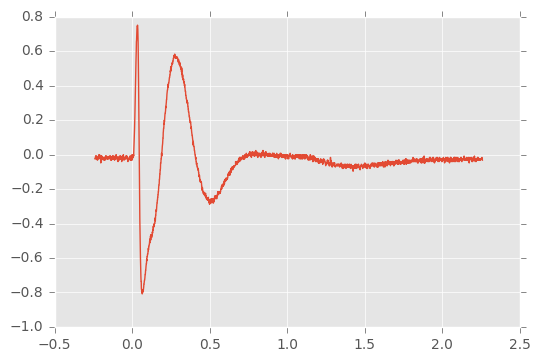

In [151]:
pyplot.plot(x_data, y_data)
pyplot.show()

We can also add some styling to make it look nicer.

The title and axis labels can be added using the relevant plot functions.

We can also add annotations such as arrows and lines. Here we've added a vertical line to show where **time = 0**, which is the point at which the stimulation was applied. The time before zero is a recording buffer.

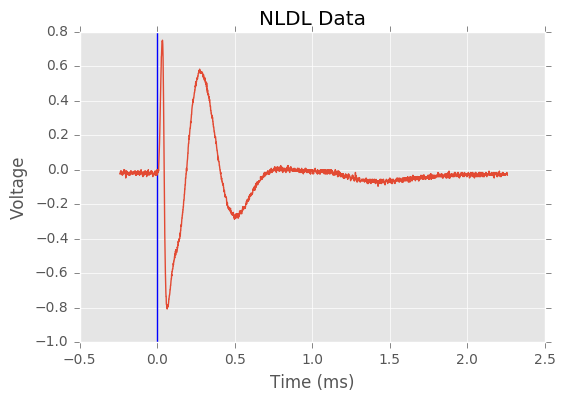

In [152]:
pyplot.style.use('ggplot')

pyplot.title('NLDL Data')
pyplot.xlabel('Time (ms)')
pyplot.ylabel('Voltage')

pyplot.axvline(x=0, color='blue')

pyplot.plot(x_data, y_data)
pyplot.show()


To save your chart as a file, change the function **show()** to **savefig()** instead.

**Jupyter Notebooks has some limitations around savefig!**<br>
Note that if you try to savefig from a different cell than the one where you generated the figure, **the output image may be blank**.

Also, in Jupyter Notebooks, using **plot()** will display the resulting figure automatically. In a script, using **show()** or **savefig()** is required.

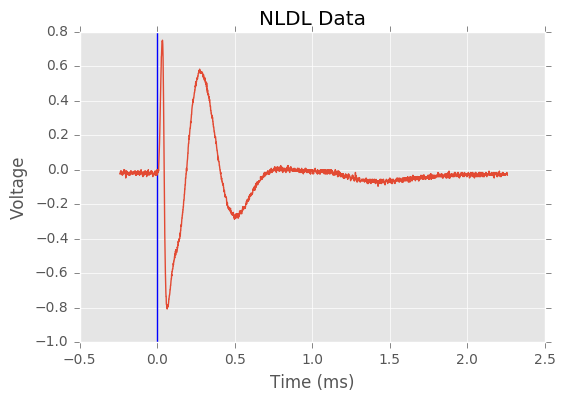

In [153]:
pyplot.style.use('ggplot')

pyplot.title('NLDL Data')
pyplot.xlabel('Time (ms)')
pyplot.ylabel('Voltage')

pyplot.axvline(x=0, color='blue')

pyplot.plot(x_data, y_data)
pyplot.savefig('TEK0000.png')
